In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os



In [24]:
def resize_image(image_path, output_size=(200, 200)):
    """
    Resizes the image at the given path to the specified output size.
    
    Parameters:
    image_path (str): The path to the image file.
    output_size (tuple): The desired output size as a tuple (width, height).
    
    Returns:
    Image: The resized image.
    """
    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            resized_img = img.resize(output_size, Image.LANCZOS)
            return resized_img
    else:
        print(f"{image_path} does not exist")
        return None

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from PIL import Image


def draw_bracket(ax, x_start, y_start, round_spacing, match_spacing, num_teams, teams=None, depth=0):
    """ Draws a single side of the bracket with adjustable team levels and shape-based logos. """
    new_teams = []
    logo_zoom = 0.1  # Adjust zoom based on the number of teams
    fixed_size = (600,500)  # Fixed size for all logos
    
    for i in range(num_teams // 2):
        y1 = y_start + i * 2 * match_spacing
        y2 = y1 + match_spacing
        x_mid = x_start + round_spacing
        
        # Draw horizontal lines for the match
        ax.plot([x_start, x_mid], [y1, y1], 'k', linewidth=2)
        ax.plot([x_start, x_mid], [y2, y2], 'k', linewidth=2)
        
        # Draw vertical line connecting the match
        ax.plot([x_mid, x_mid], [y1, y2], 'k', linewidth=2)
        
        if teams and len(teams) > i * 2:
            ax.text(x_start + 0.1, y1+0.1, teams[i * 2], ha='left', fontsize=12, fontweight='bold', color='darkblue')
            ax.text(x_start + 0.1, y2+0.1, teams[i * 2 + 1], ha='left', fontsize=12, fontweight='bold', color='darkblue')
            
            # Load and resize team logos
            logo1_path = os.path.join('Summit League Logos', f'{teams[i * 2]}.png')
            logo2_path = os.path.join('Summit League Logos', f'{teams[i * 2 + 1]}.png')
            
            if os.path.exists(logo1_path):
                logo1 = resize_image(logo1_path, output_size=fixed_size)
                if logo1:
                    logo1 = np.array(logo1)
                    imagebox1 = OffsetImage(logo1, zoom=logo_zoom)
                    ab1 = AnnotationBbox(imagebox1, (x_start-0.25, y1), frameon=False)
                    ax.add_artist(ab1)
                
            else:
                print(logo1_path, "does not exist")
            
            if os.path.exists(logo2_path):
                logo2 = resize_image(logo2_path, output_size=fixed_size)
                if logo2:
                    logo2 = np.array(logo2)
                    imagebox2 = OffsetImage(logo2, zoom=logo_zoom)
                    ab2 = AnnotationBbox(imagebox2, (x_start-0.25, y2), frameon=False)
                    ax.add_artist(ab2)
            
            # Flip a coin for winning team
            if np.random.rand() > 0.5:
                new_teams.append(f'{teams[i * 2]}')
            else:
                new_teams.append(f'{teams[i * 2 + 1]}')
        else:
            new_teams.append(f'Winner {i * 2 + 1}')
    
    if num_teams > 2:
        draw_bracket(ax, x_mid, y_start + match_spacing / 2, round_spacing, match_spacing * 2, num_teams // 2, new_teams, depth + 1)


In [49]:

def plot_ncaa_bracket(num_teams=8, teams=None):
    if num_teams & (num_teams - 1) != 0:
        raise ValueError("Number of teams must be a power of 2 (e.g., 4, 8, 16, 32, etc.)")
    
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.set_xlim(0, np.log2(num_teams) * 3)
    ax.set_ylim(0, num_teams)
    ax.axis('off')
    ax.set_facecolor("#f5f5f5")
    
    round_spacing = 2.0
    match_spacing = 1.0
    
    draw_bracket(ax, 1, 0.5, round_spacing, match_spacing, num_teams, teams)
    
    ax.text(np.log2(num_teams) * 3 - 1, num_teams / 2, 'CHAMPION', ha='center', fontsize=14, fontweight='bold', color='darkred', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    plt.show()


In [ ]:
# Dictionary of seeds with teams
seeds = {
    1: 'Denver',
    2: 'Nebraska-Omaha',
    3: 'North_Dakota_State',
    4: 'Oral_Roberts',
    5: 'South_Dakota',
    6: 'south_dakota_state',
    7: 'St-thomas-mn',
    8: 'umkc'
}
# List of matchups in classic tournament format
matchups = [
    (1, 8),  # Seed 1 vs Seed 8
    (2, 7),  # Seed 2 vs Seed 7
    (3, 6),  # Seed 3 vs Seed 6
    (4, 5)   # Seed 4 vs Seed 5
]

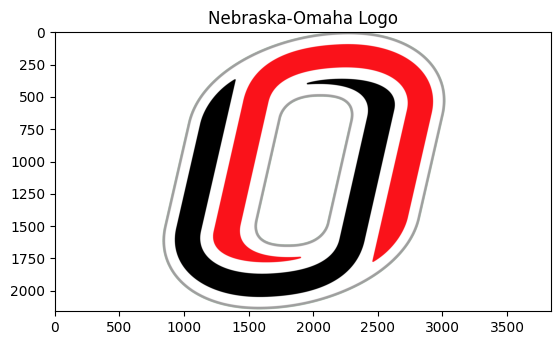

In [72]:
# Verify the Nebraska-Omaha logo colors
nebraska_omaha_logo_path = os.path.join('Summit League Logos', 'Nebraska-Omaha.png')
if os.path.exists(nebraska_omaha_logo_path):
    nebraska_omaha_logo = plt.imread(nebraska_omaha_logo_path)
    plt.imshow(nebraska_omaha_logo)
    plt.title('Nebraska-Omaha Logo')
    plt.show()
else:
    print(nebraska_omaha_logo_path, "does not exist")

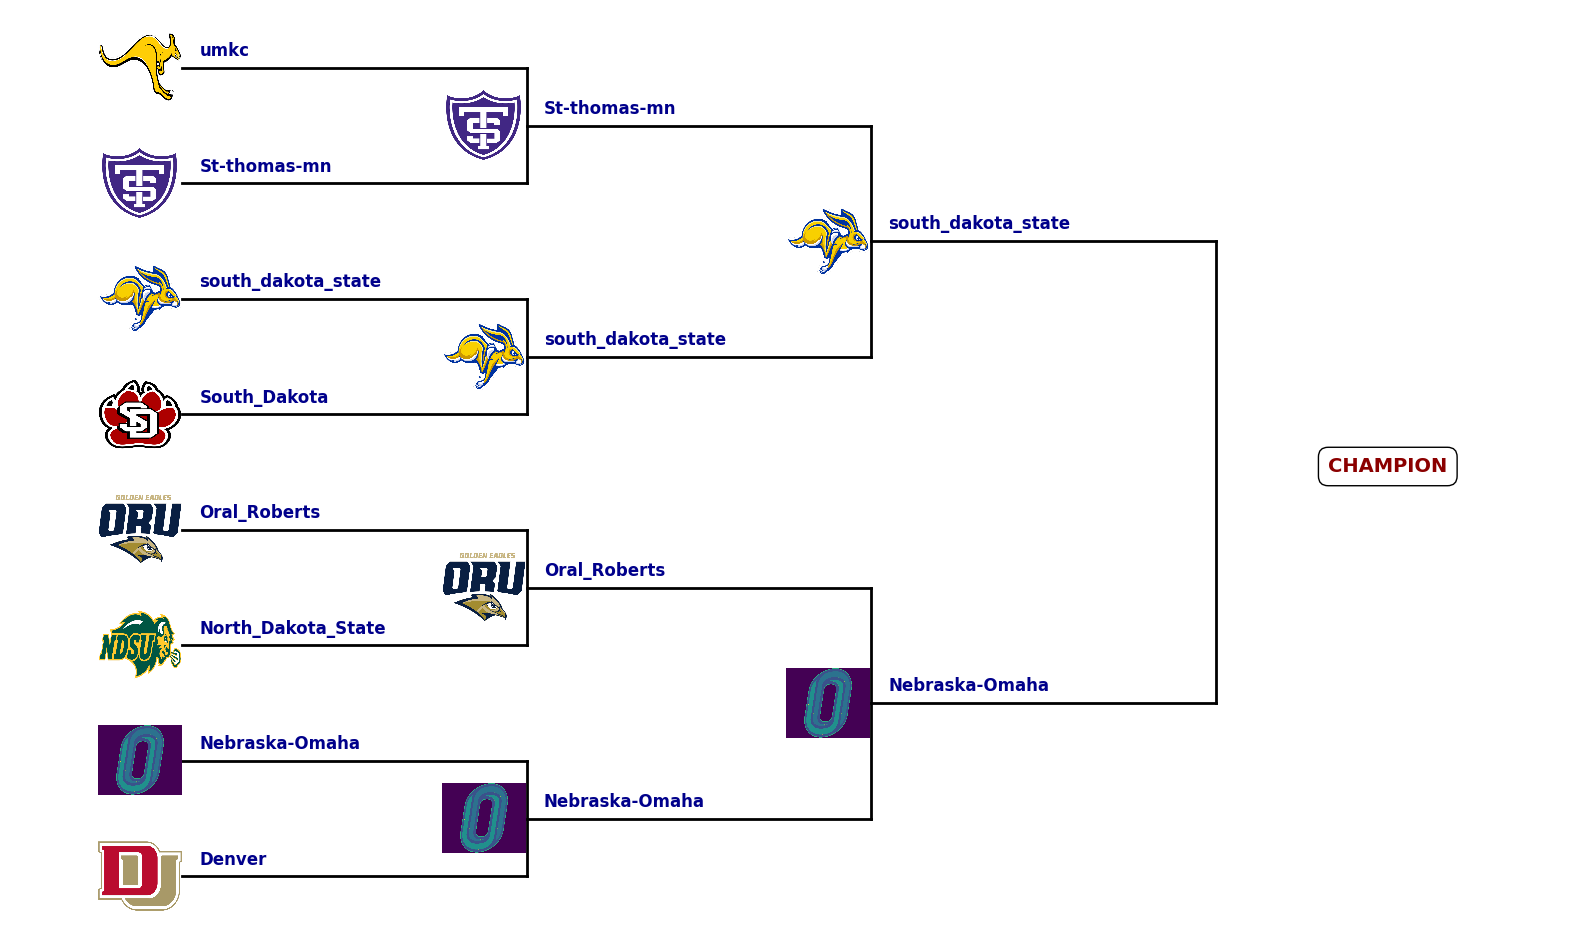

In [71]:

# Change the number of teams here
SummitLeague = ['Denver','Nebraska-Omaha','North_Dakota_State','Oral_Roberts','South_Dakota','south_dakota_state','St-thomas-mn', 'umkc']

plot_ncaa_bracket(num_teams=len(SummitLeague), teams = SummitLeague)